<a href="https://colab.research.google.com/github/UygarUsta/computer-vision-notebooks/blob/main/Keras_Core_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/keras-team/keras-core.git

Cloning into 'keras-core'...
remote: Enumerating objects: 9930, done.
remote: Counting objects: 100% (2944/2944), done.
remote: Compressing objects: 100% (839/839), done.
remote: Total 9930 (delta 2342), reused 2549 (delta 2104), pack-reused 6986
Receiving objects: 100% (9930/9930), 3.00 MiB | 3.36 MiB/s, done.
Resolving deltas: 100% (7509/7509), done.


In [2]:
%cd keras-core

/content/keras-core


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python pip_build.py --install

In [5]:
import os

# Set backend env to torch
os.environ["KERAS_BACKEND"] = "torch"

import torch
import torch.nn as nn
import torch.optim as optim
from keras_core import layers
import keras_core
import numpy as np

Using PyTorch backend.


In [6]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
learning_rate = 0.01
batch_size = 64
num_epochs = 1

In [7]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras_core.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# Create the Keras model
model = keras_core.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes),
    ]
)


In [11]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Instantiate the torch loss function
loss_fn = nn.CrossEntropyLoss()


def train(model, train_loader, num_epochs, optimizer, loss_fn):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            # Forward pass
            inputs = inputs.cuda(non_blocking=True)
            targets = targets.cuda(non_blocking=True)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Print loss statistics
            if (batch_idx + 1) % 10 == 0:
                print(
                    f"Epoch [{epoch+1}/{num_epochs}], "
                    f"Batch [{batch_idx+1}/{len(train_loader)}], "
                    f"Loss: {running_loss / 10}"
                )
                running_loss = 0.0

In [12]:
# Create a TensorDataset
dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(x_train), torch.from_numpy(y_train)
)

# Create a DataLoader
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=False
)

train(model, train_loader, num_epochs, optimizer, loss_fn)


Epoch [1/1], Batch [10/938], Loss: 1.4372071981430055
Epoch [1/1], Batch [20/938], Loss: 0.587936308979988
Epoch [1/1], Batch [30/938], Loss: 0.26413131803274154
Epoch [1/1], Batch [40/938], Loss: 0.23916680216789246
Epoch [1/1], Batch [50/938], Loss: 0.2260119415819645
Epoch [1/1], Batch [60/938], Loss: 0.21202343925833703
Epoch [1/1], Batch [70/938], Loss: 0.21111297160387038
Epoch [1/1], Batch [80/938], Loss: 0.15760304369032382
Epoch [1/1], Batch [90/938], Loss: 0.14103009700775146
Epoch [1/1], Batch [100/938], Loss: 0.11094441041350364
Epoch [1/1], Batch [110/938], Loss: 0.1779641892760992
Epoch [1/1], Batch [120/938], Loss: 0.1536353699862957
Epoch [1/1], Batch [130/938], Loss: 0.16312939301133156
Epoch [1/1], Batch [140/938], Loss: 0.2176670916378498
Epoch [1/1], Batch [150/938], Loss: 0.16550753377377986
Epoch [1/1], Batch [160/938], Loss: 0.14916107915341853
Epoch [1/1], Batch [170/938], Loss: 0.1481677794829011
Epoch [1/1], Batch [180/938], Loss: 0.10803943369537591
Epoch [1/

In [21]:
pred = model.predict(x_test[10][None])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [22]:
np.argmax(pred)

0

In [16]:
import matplotlib.pyplot as plt

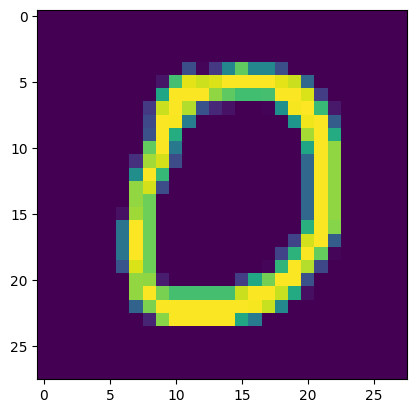

In [20]:
plt.imshow(x_test[10])

In [30]:
torch_pred = model(x_test[0][None])

In [29]:
type(pred)

numpy.ndarray

In [31]:
print(torch_pred)

tensor([[ -8.0053,  -7.6940,   1.4342,  -4.5444, -11.6261,  -8.1987, -26.0730,
          19.9152,  -4.1142,  -2.6067]], device='cuda:0',
       grad_fn=<AddBackward0>)


In [32]:
print(torch_pred.argmax())

tensor(7, device='cuda:0')


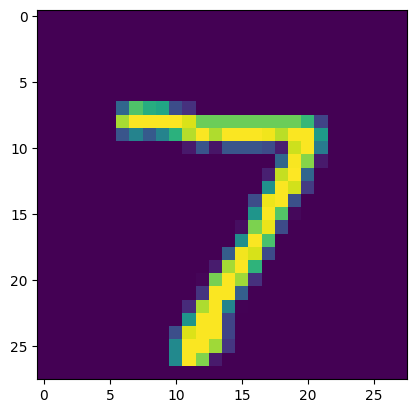

In [33]:
plt.imshow(x_test[0])